## Download the required packages

In [ ]:
!pip install wget
!pip install open3d
!pip install pypotree 

## Download the dataset

In [ ]:
# mount google drive
import os
import wget
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
%cd /content/drive/My Drive/

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
# Create download directory if it doesn't exist
download_path = "CameraLidarFusion"
if not os.path.exists(download_path):
    os.makedirs(download_path)
    print(download_path, "- Created Successfully!")
else:
    print("Folder already exists!")

Folder already exists!


In [ ]:
# download the dataset
dataset_url = "https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0001/2011_09_26_drive_0001_sync.zip"
print('Downloading dataset zip file...')
wget.download(dataset_url, out=download_path)

'CameraLidarFusion/2011_09_26_drive_0001_sync.zip'

In [ ]:
# Unzip the dataset
%cd CameraLidarFusion
!unzip 2011_09_26_drive_0001_sync.zip &> /dev/null
%cd /content/drive/MyDrive/CameraLidarFusion/2011_09_26/2011_09_26_drive_0001_sync

/content/drive/MyDrive/CameraLidarFusion
Archive:  2011_09_26_drive_0001_sync.zip
   creating: 2011_09_26/2011_09_26_drive_0001_sync/oxts/
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/timestamps.txt  
   creating: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000017.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000083.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000043.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000059.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000062.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000009.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000106.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000075.txt  
 extracting: 2011_09_26/2011_09_26_drive_0001_sync/oxts/data/0000000046.txt  
 extracting: 2011_09_26/

## Prepare and visualize the dataset

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import glob
import numpy as np
import struct
import open3d as o3d

### BIN TO PCD

In [ ]:
# BinToPcd function
def BinToPcd(point_file):
  size_float = 4
  list_pcd = []
  file_to_open = point_file
  file_to_save = str(point_file)[:-3]+"pcd"
  with open (file_to_open, "rb") as f:
      byte = f.read(size_float*4)
      while byte:
          x,y,z,intensity = struct.unpack("ffff", byte)
          list_pcd.append([x, y, z])
          byte = f.read(size_float*4)
  np_pcd = np.asarray(list_pcd)
  pcd = o3d.geometry.PointCloud()
  v3d = o3d.utility.Vector3dVector
  pcd.points = v3d(np_pcd)
  o3d.io.write_point_cloud(file_to_save, pcd)

# Read bin files
point_files = sorted(glob.glob("velodyne_points/data/*.bin"))
# Convert bin to PCD
for binFile in point_files:
  BinToPcd(binFile)

### Read images and pointcloud files

In [ ]:
image_files = sorted(glob.glob("image_02/data/*.png"))
point_files = sorted(glob.glob("velodyne_points/data/*.pcd"))
index = 0
pcd_file = point_files[index]
image = cv2.cvtColor(cv2.imread(image_files[index]), cv2.COLOR_BGR2RGB)
cloud = o3d.io.read_point_cloud(pcd_file)
points= np.asarray(cloud.points)

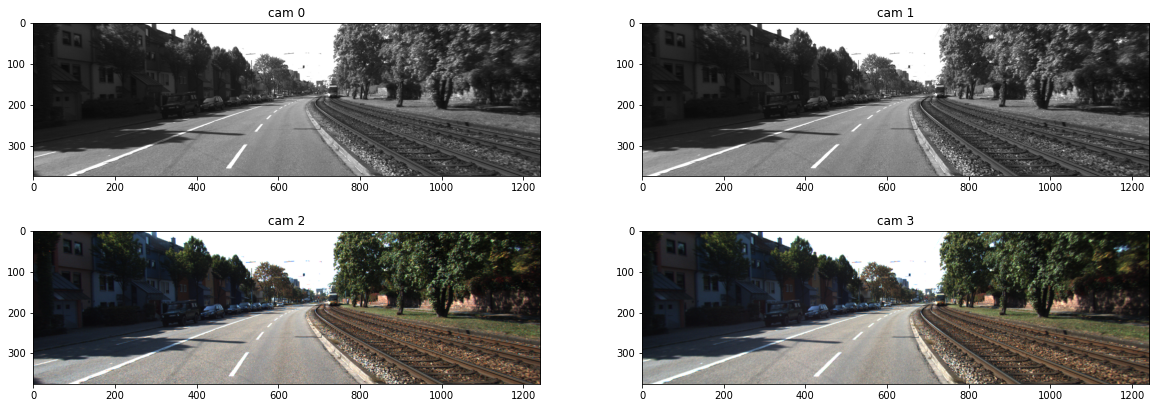

In [ ]:
# read all the cameras data
camera0_images = sorted(glob.glob("image_00/data/*.png"))
camera1_images = sorted(glob.glob("image_01/data/*.png"))
camera2_images = sorted(glob.glob("image_02/data/*.png"))
camera3_images = sorted(glob.glob("image_03/data/*.png"))

# Create 4 images for 4 cameras
img_cam0 = cv2.cvtColor(cv2.imread(camera0_images[index]), cv2.COLOR_BGR2RGB)
img_cam1 = cv2.cvtColor(cv2.imread(camera1_images[index]), cv2.COLOR_BGR2RGB)
img_cam2 = cv2.cvtColor(cv2.imread(camera2_images[index]), cv2.COLOR_BGR2RGB)
img_cam3 = cv2.cvtColor(cv2.imread(camera3_images[index]), cv2.COLOR_BGR2RGB)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 7))

# Set the first subplot to display the first image
axs[0, 0].imshow(img_cam0)
axs[0, 0].set_title('cam 0')

# Set the second subplot to display the second image
axs[0, 1].imshow(img_cam1)
axs[0, 1].set_title('cam 1')

# Set the third subplot to display the third image
axs[1, 0].imshow(img_cam2)
axs[1, 0].set_title('cam 2')

# Set the fourth subplot to display the fourth image
axs[1, 1].imshow(img_cam3)
axs[1, 1].set_title('cam 3')

# Show the plot
plt.show()

### Visualize the images

Text(0.5, 1.0, 'Image')

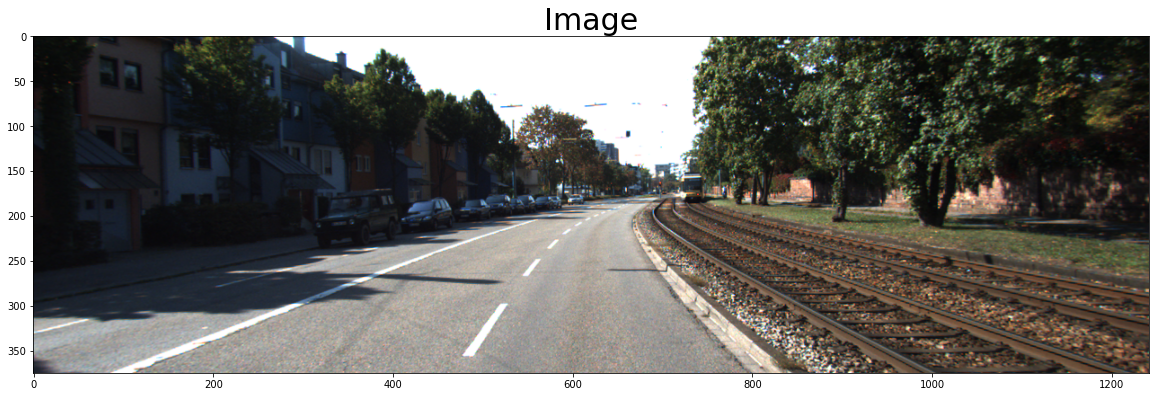

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Image', fontsize=30)

### Visualize the pointcloud

In [ ]:
import pypotree 
cloudpath = pypotree.generate_cloud_for_display(points)
pypotree.display_cloud_colab(cloudpath)

/usr/local/lib/python3.8/dist-packages/bin/PotreeConverter .tmp.txt -f xyz -o point_clouds -p 691fcf --material ELEVATION --edl-enabled --overwrite
server on port 17902: thread <Thread(Thread-13, started 140680772970240)> 
https://localhost:17902/point_clouds/pointclouds/691fcf
